## 8.1 의사결정나무

**의사결정나무(decision tree)**는 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형이다. 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있기 때문에 **CART(Classification And Regression Tree)**라고도 한다.

### 의사결정나무를 이용한 분류학습

의사결정나무를 이용한 분류법은 다음과 같다.

1. 여러가지 독립 변수 중 하나의 독립 변수를 선택하고 그 독립 변수에 대한 기준값(threshold)을 정한다. 이를 분류 규칙이라고 한다. 최적의 분류 규칙을 찾는 방법은 이후에 자세히 설명한다.
2. 전체 학습 데이터 집합(부모 노드)을 해당 독립 변수의 값이 기준값보다 작은 데이터 그룹(자식 노드 1)과 해당 독립 변수의 값이 기준값보다 큰 데이터 그룹(자식 노드 2)으로 나눈다. 
3. 각각의 자식 노드에 대해 1~2의 단계를 반복하여 하위의 자식 노드를 만든다. 단, 자식 노드에 한가지 클래스의 데이터만 존재한다면 더 이상 자식 노드를 나누지 않고 중지한다.

이렇게 자식 노드 나누기를 연속적으로 적용하면 노드가 계속 증가하는 나무(tree)와 같은 형태로 표현할 수 있다.

### 의사결정나무를 사용한 분류예측

의사결정나무에 전체 트레이닝 데이터를 모두 적용해 보면 각 데이터는 특정한 노드를 타고 내려가게 된다. 각 노드는 그 노드를 선택한 데이터 집합을 가진다. 이 때 노드에 속한 데이터의 클래스의 비율을 구하여 이를 그 노드의 조건부 확률 분포 $P(Y=k|X)_{\text{node}}$라고 정의한다.

$$ P(Y=k|X)_{\text{node}} \approx \dfrac{N_{\text{node},k}}{N_{\text{node}}} $$

테스트 데이터 $X_{\text{test}}$의 클래스를 예측할 때는 가장 상위의 노드부터 분류 규칙을 차례대로 적용하여 마지막에 도달하는 노드의 조건부 확률 분포를 이용하여 클래스를 예측한다.

$$ \hat{Y} = \text{arg}\max_k P(Y=k|X_{\text{test}})_{\text{last node}} $$

###  분류규칙을 정하는 방법

분류 규칙을 정하는 방법은 부모 노드와 자식 노드 간의 엔트로피를 가장 낮게 만드는 최상의 독립 변수와 기준값을 찾는 것이다. 이러한 기준을 정량화한 것이 정보획득량(information gain)이다. 기본적으로 모든 독립 변수와 모든 가능한 기준값에 대해 정보획득량을 구하여 가장 정보획득량이 큰 독립 변수와 기준값을 선택한다.

### 정보획득량

정보획득량(information gain)는 $X$라는 조건에 의해 확률 변수 $Y$의 엔트로피가 얼마나 감소하였는가를 나타내는 값이다. 다음처럼 $Y$의 엔트로피에서 $X$에 대한 $Y$의 조건부 엔트로피를 뺀 값으로 정의된다. 

$$ IG[Y,X] = H[Y] - H[Y|X] $$ 

예를 들어 A, B 두 가지의 다른 분류 규칙을 적용했더니 다음 처럼 서로 다르게 데이터가 나뉘어 졌다고 가정하자.

<img src="https://datascienceschool.net/upfiles/b9fe188ad28b4c9fb2cd5a0292b49502.png" style="width:100%;">

그림 43.1 : 분류 결과 예시


A 방법과 B 방법 모두 노드 분리 전에는 Y=0 인 데이터의 수와 Y=1 인 데이터의 수가 모두 40개였다. 

A 방법으로 노드를 분리하면 다음과 같은 두 개의 자식 노드가 생긴다.
* 자식 노드 A1은 Y=0 인 데이터가 30개, Y=1 인 데이터가 10개 
* 자식 노드 A2은 Y=0 인 데이터가 10개, Y=1 인 데이터가 30개 

B 방법으로 노드를 분리하면 다음과 같은 두 개의 자식 노드가 생긴다.
* 자식 노드 B1은 Y=0 인 데이터가 20개, Y=1 인 데이터가 40개 
* 자식 노드 B2은 Y=0 인 데이터가 20개, Y=1 인 데이터가 0개 

우선 부모 노드의 엔트로피를 계산하면 다음과 같다.


$$ H[Y] = -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) = \dfrac{1}{2} + \dfrac{1}{2}  = 1 $$


A 방법에 대해 IG를 계산하면 다음과 같다.

$$ H[Y|X=X_1] = -\dfrac{3}{4}\log_2\left(\dfrac{3}{4}\right) -\dfrac{1}{4}\log_2\left(\dfrac{1}{4}\right) = 0.81 $$

$$ H[Y|X=X_2] = -\dfrac{1}{4}\log_2\left(\dfrac{1}{4}\right)  -\dfrac{3}{4}\log_2\left(\dfrac{3}{4}\right) = 0.81 $$

$$ H[Y|X] = \dfrac{1}{2} H[Y|X=X_1] + \dfrac{1}{2} H[Y|X=X_2] = 0.81 $$

$$ IG = H[Y] - H[Y|X] = 0.19 $$ 

B 방법에 대해 IG를 계산하면 다음과 같다.

$$ H[Y|X=X_1] = -\dfrac{1}{3}\log_2\left(\dfrac{1}{3}\right) - \dfrac{2}{3}\log_2\left(\dfrac{2}{3}\right) = 0.92 $$

$$ H[Y|X=X_2] = 0 $$

$$ H[Y|X] = \dfrac{3}{4} H[Y|X=X_1] + \dfrac{1}{4} H[Y|X=X_2] = 0.69 $$

$$ IG = H[D] - H[Y|X] = 0.31 $$ 

따라서 B 방법이 더 나은 방법임을 알 수 있다.

### Scikit-Learn의 의사결정나무 클래스

Scikit-Learn에서 의사결정나무는 `DecisionTreeClassifier` 클래스로 구현되어있다. 여기에서는 붓꽃 분류 문제를 예를 들어 의사결정나무를 설명한다. 이 예제에서는 독립변수 공간을 공간상에 표시하기 위해 꽃의 길이와 폭만을 독립변수로 사용하였다.

In [1]:
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

다음은 의사결정나무를 시각화하기 위한 코드이다. `draw_decision_tree` 함수는 의사결정나무의 의사 결정 과정의 세부적인 내역을 다이어그램으로 보여주고  `plot_decision_regions` 함수는 이러한 의사 결정에 의해 데이터의 영역이 어떻게 나뉘어졌는지를 시각화하여 보여준다.

In [2]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz


def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

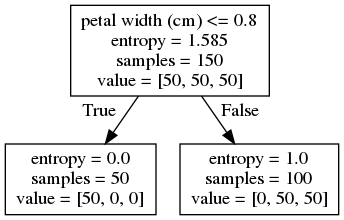

In [3]:
draw_decision_tree(tree1)

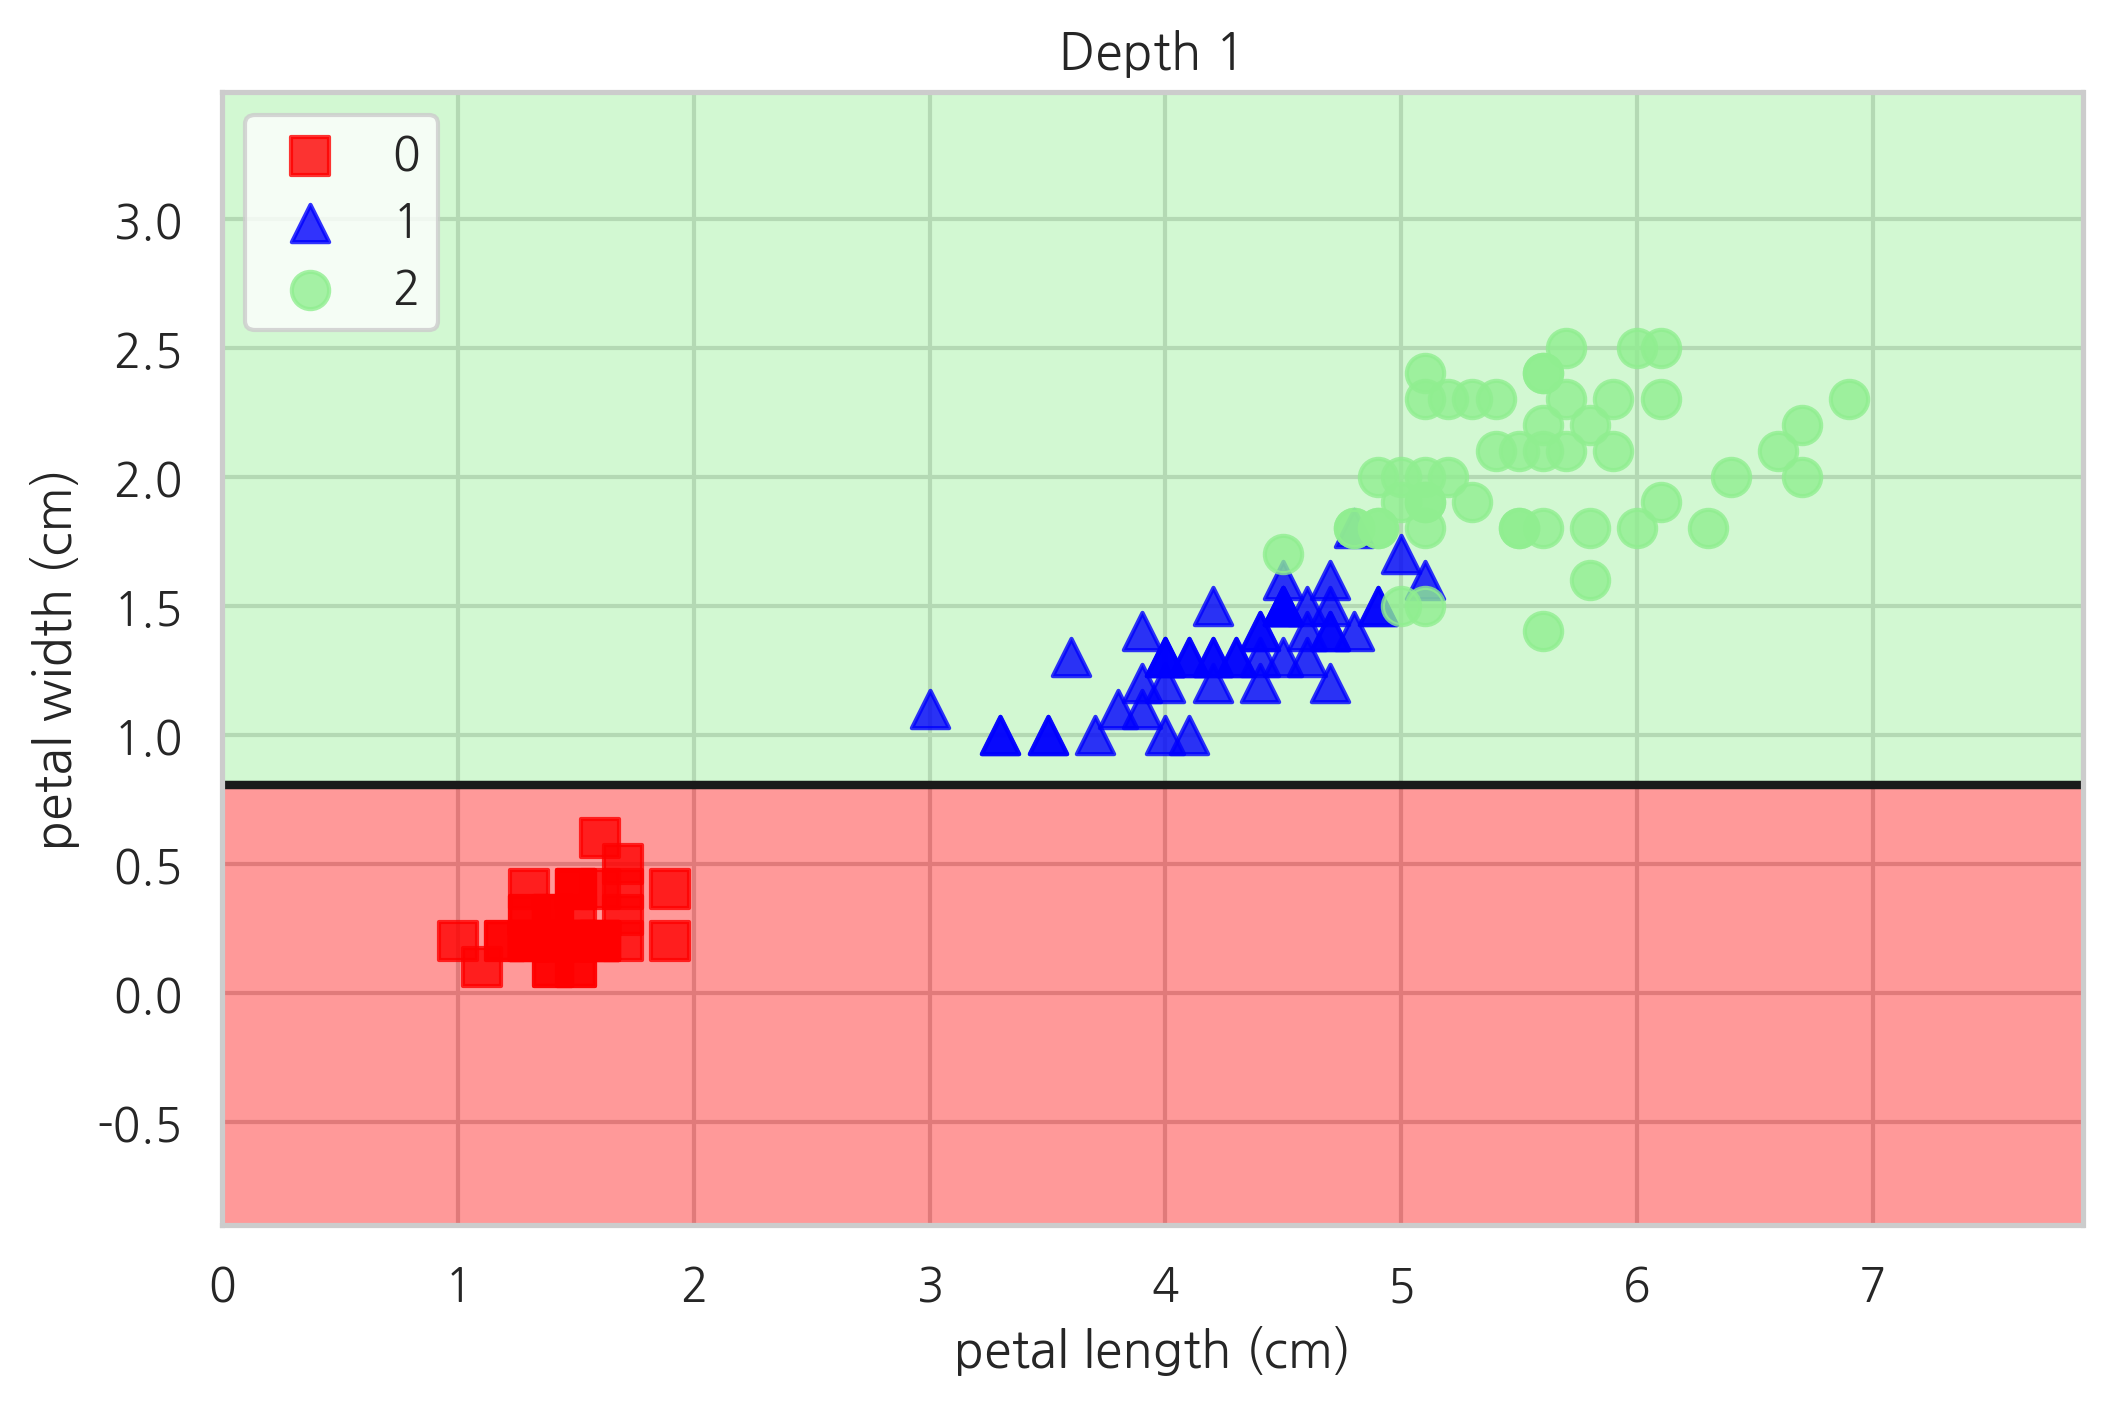

In [4]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]])

In [6]:
tree2 = DecisionTreeClassifier(
    criterion='entropy', max_depth=2, random_state=0).fit(X, y)

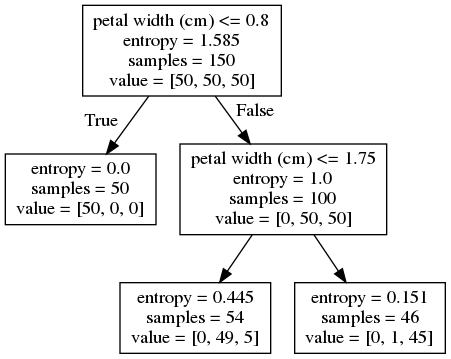

In [7]:
draw_decision_tree(tree2)

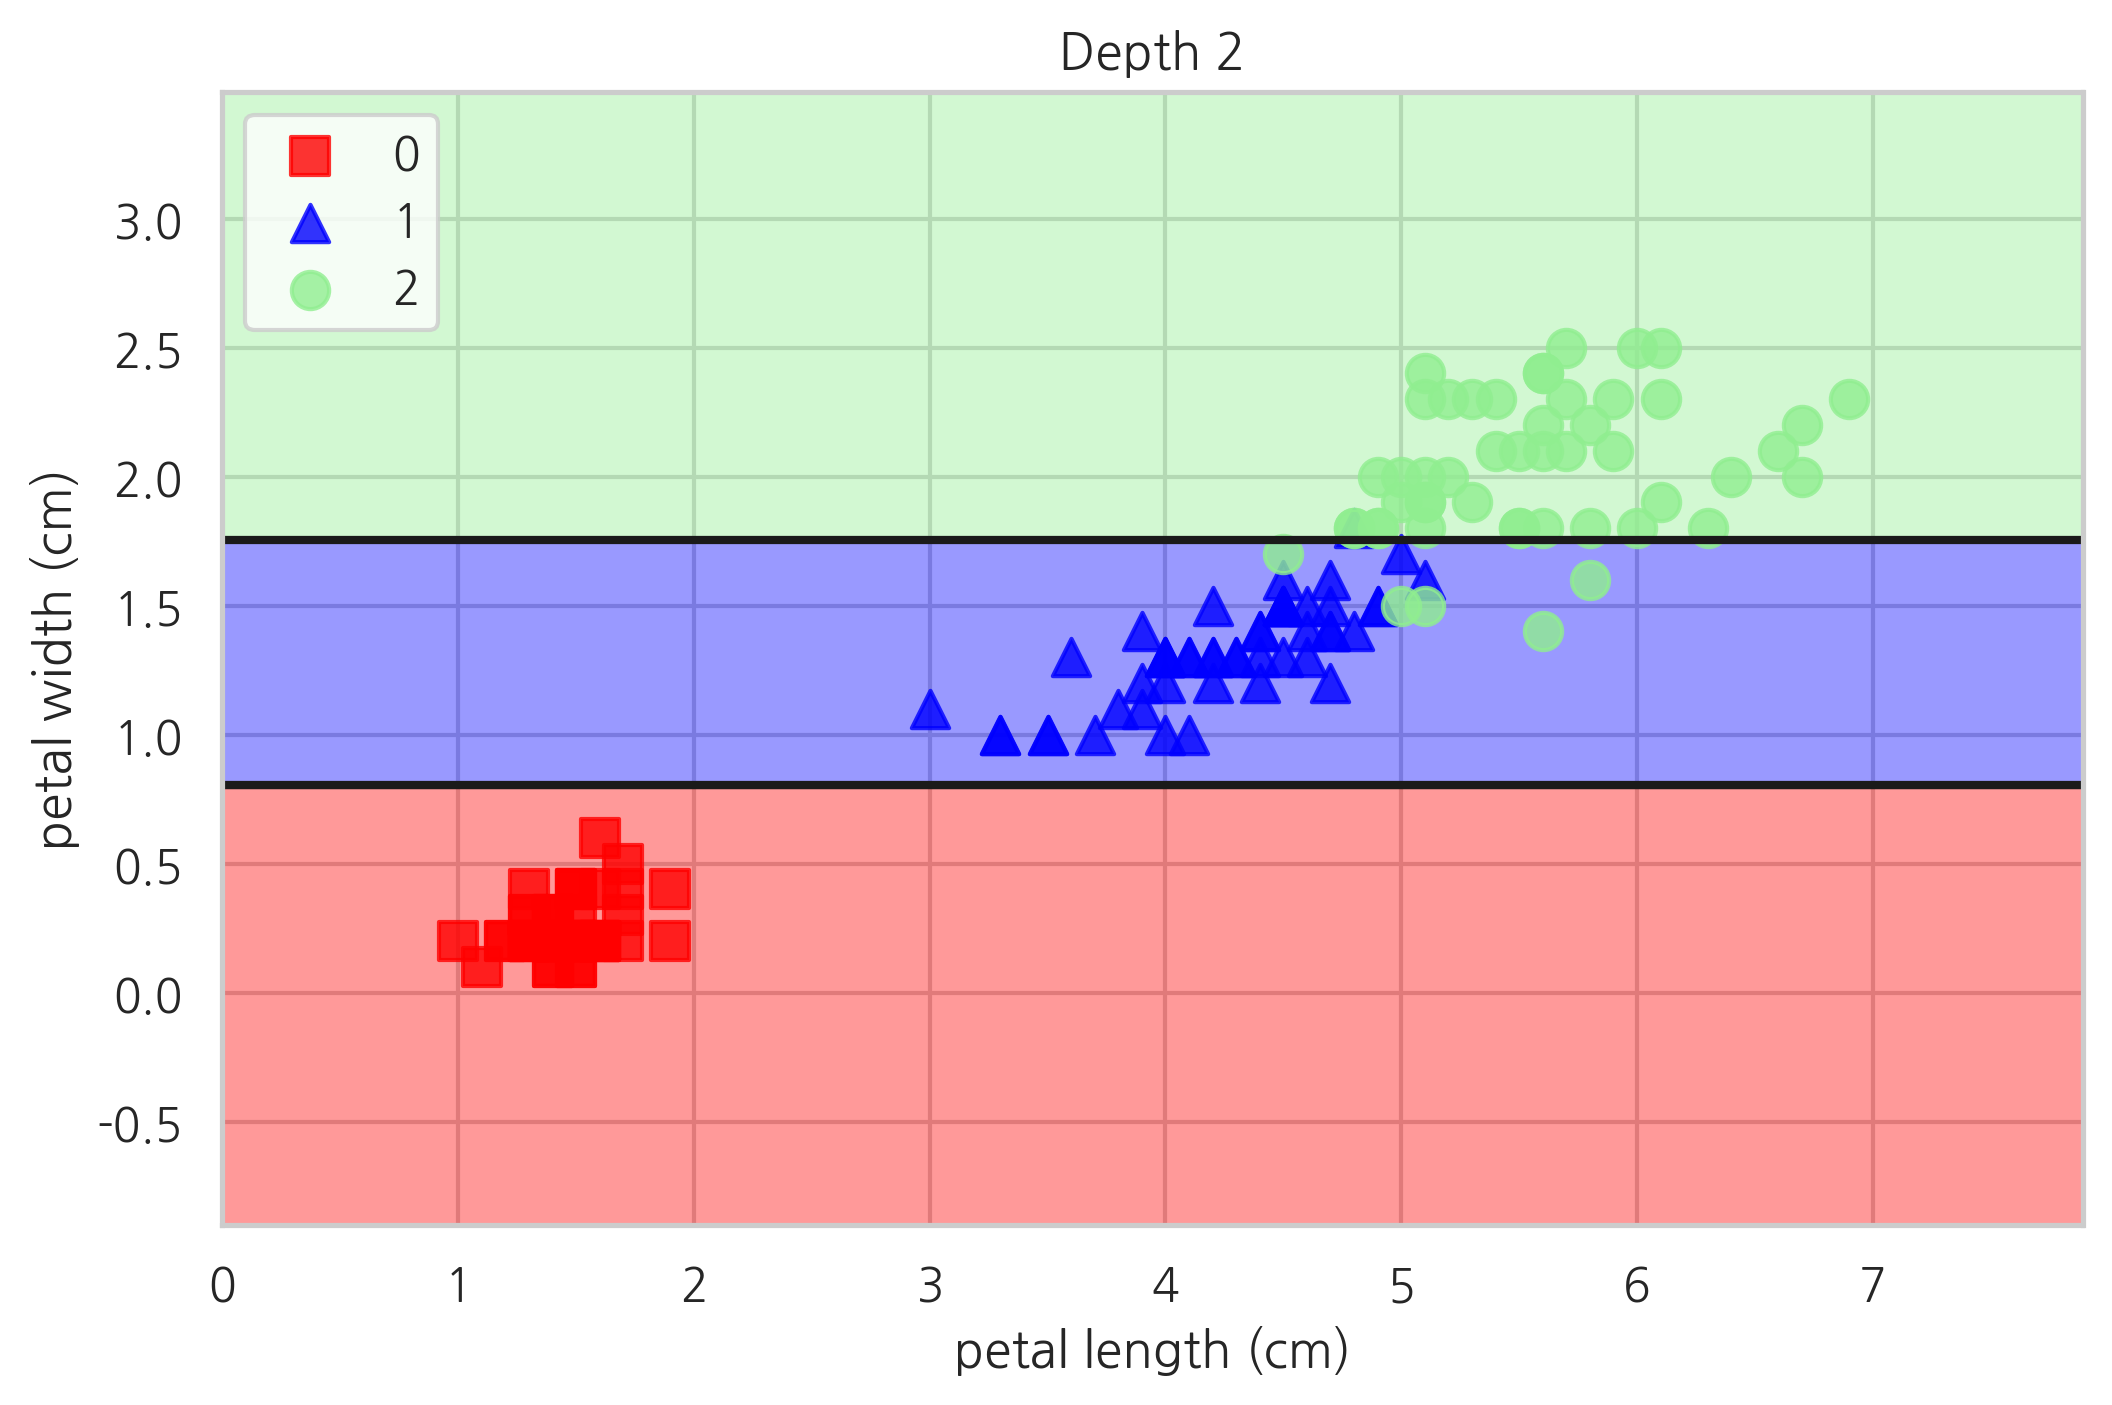

In [8]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

In [9]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

In [10]:
tree3 = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, random_state=0).fit(X, y)

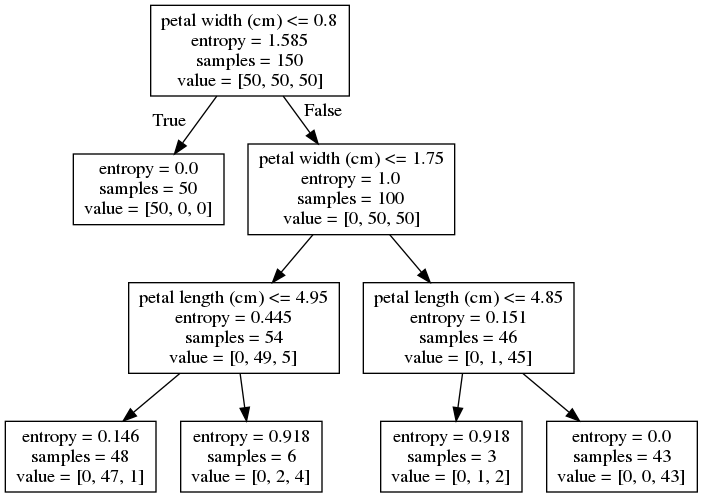

In [11]:
draw_decision_tree(tree3)

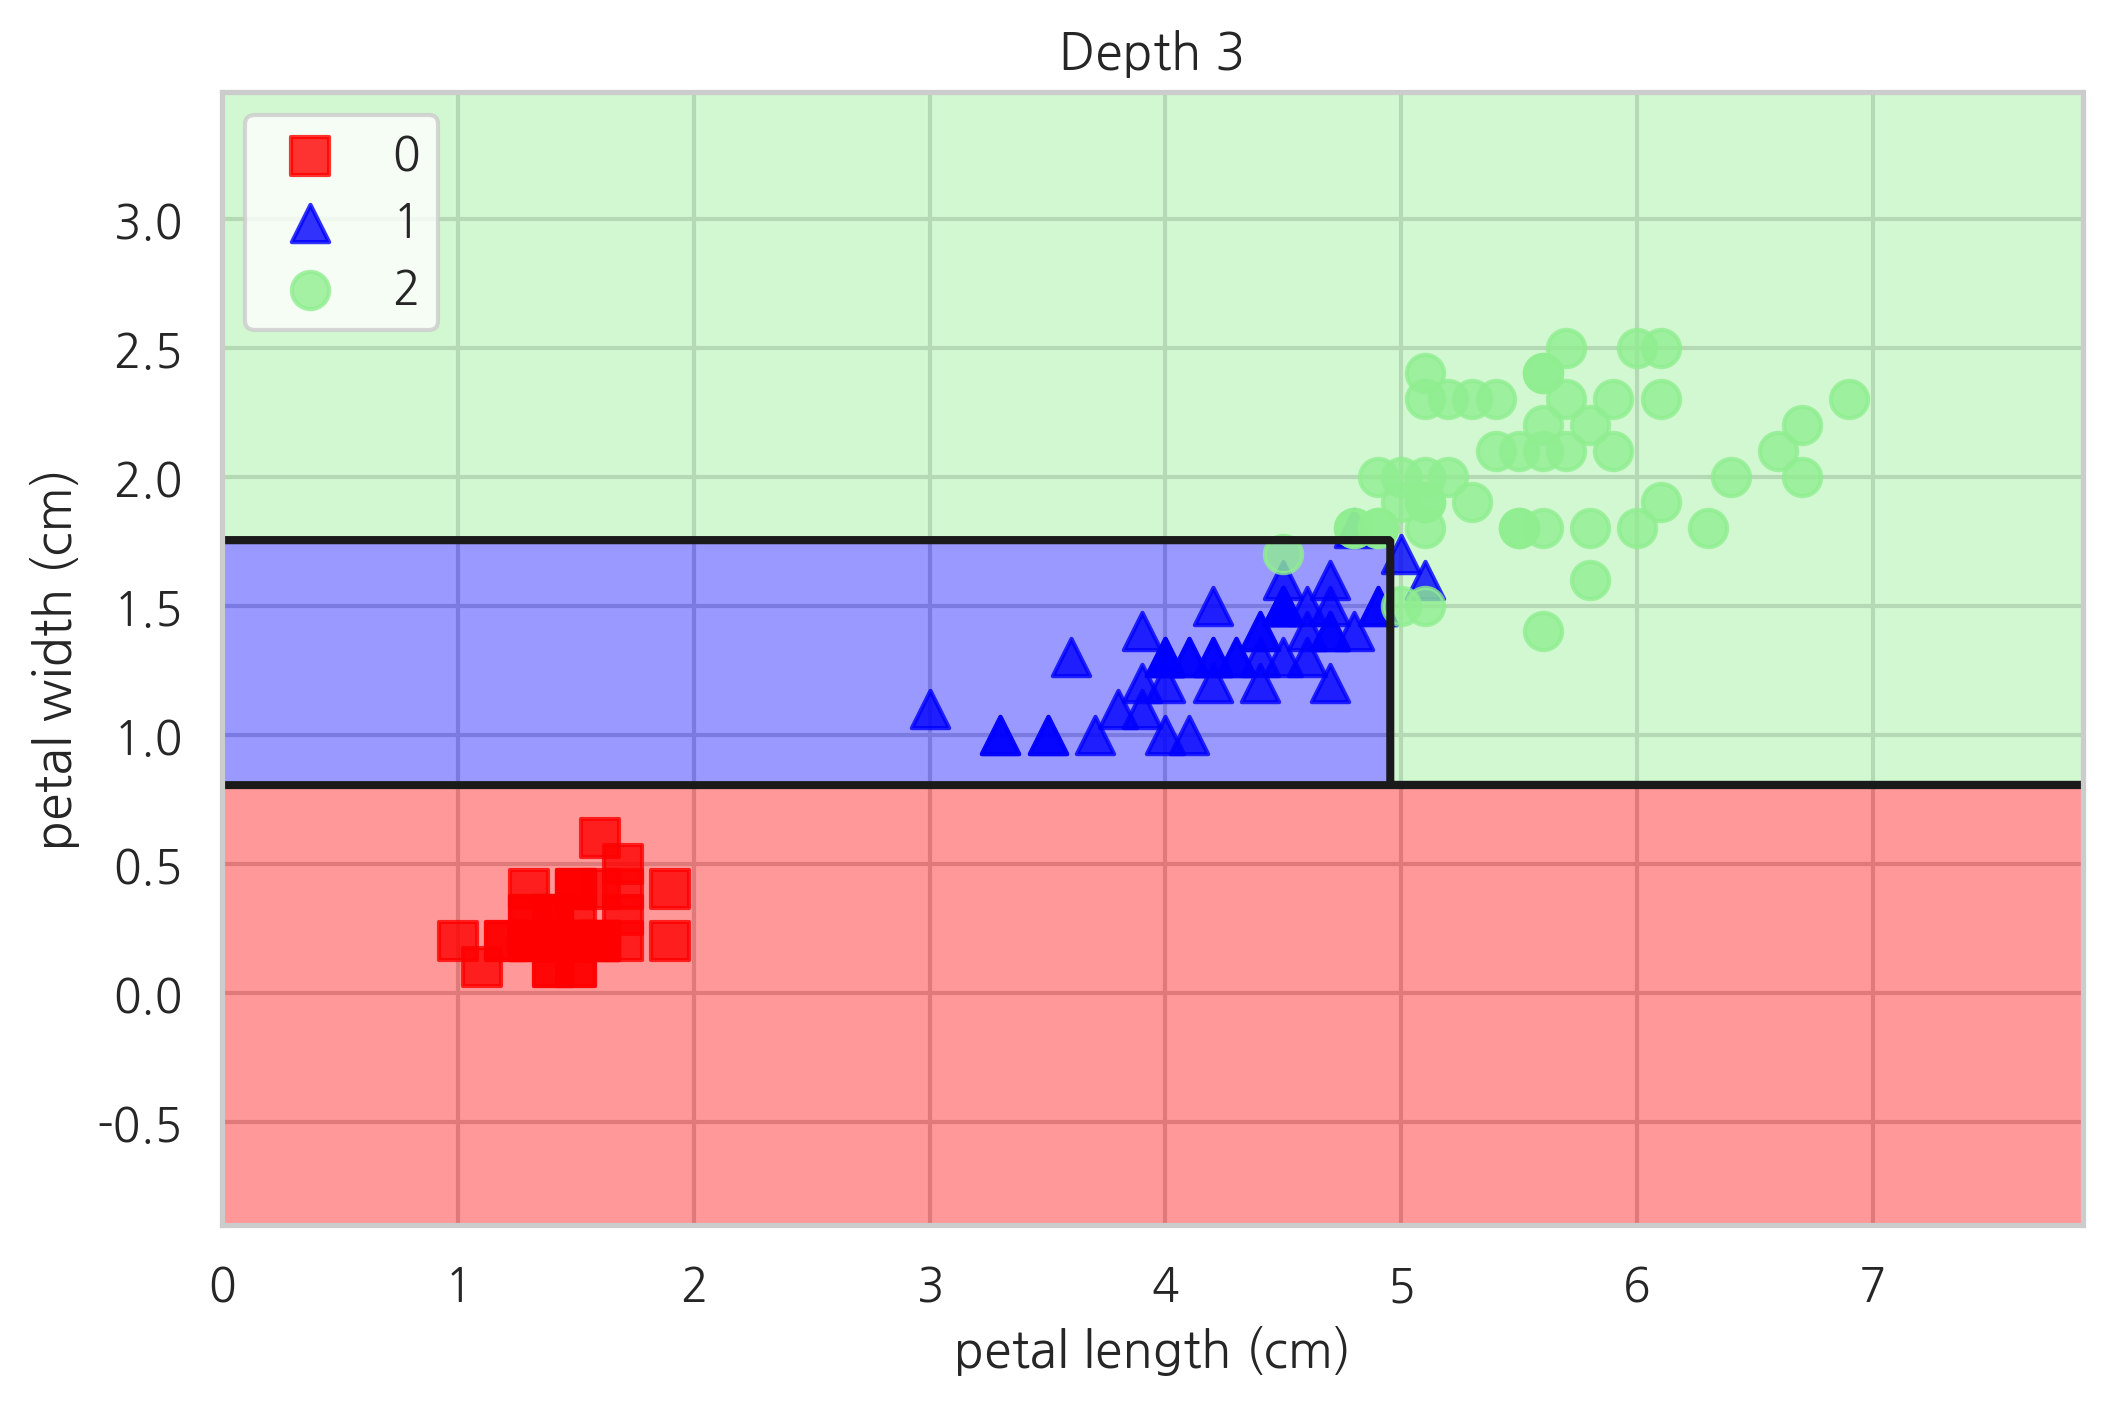

In [12]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()

In [13]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [14]:
tree4 = DecisionTreeClassifier(
    criterion='entropy', max_depth=4, random_state=0).fit(X, y)

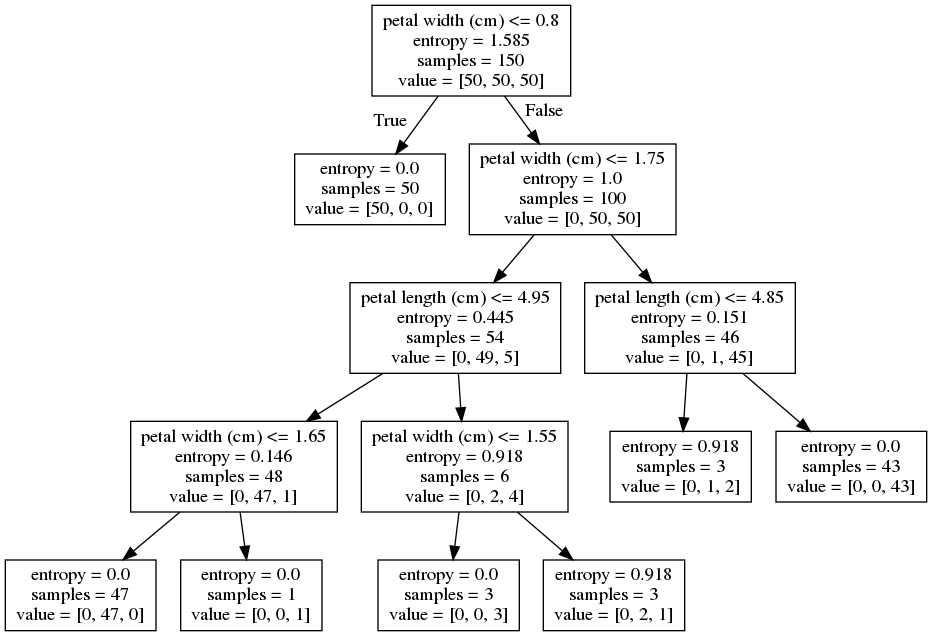

In [15]:
draw_decision_tree(tree4)

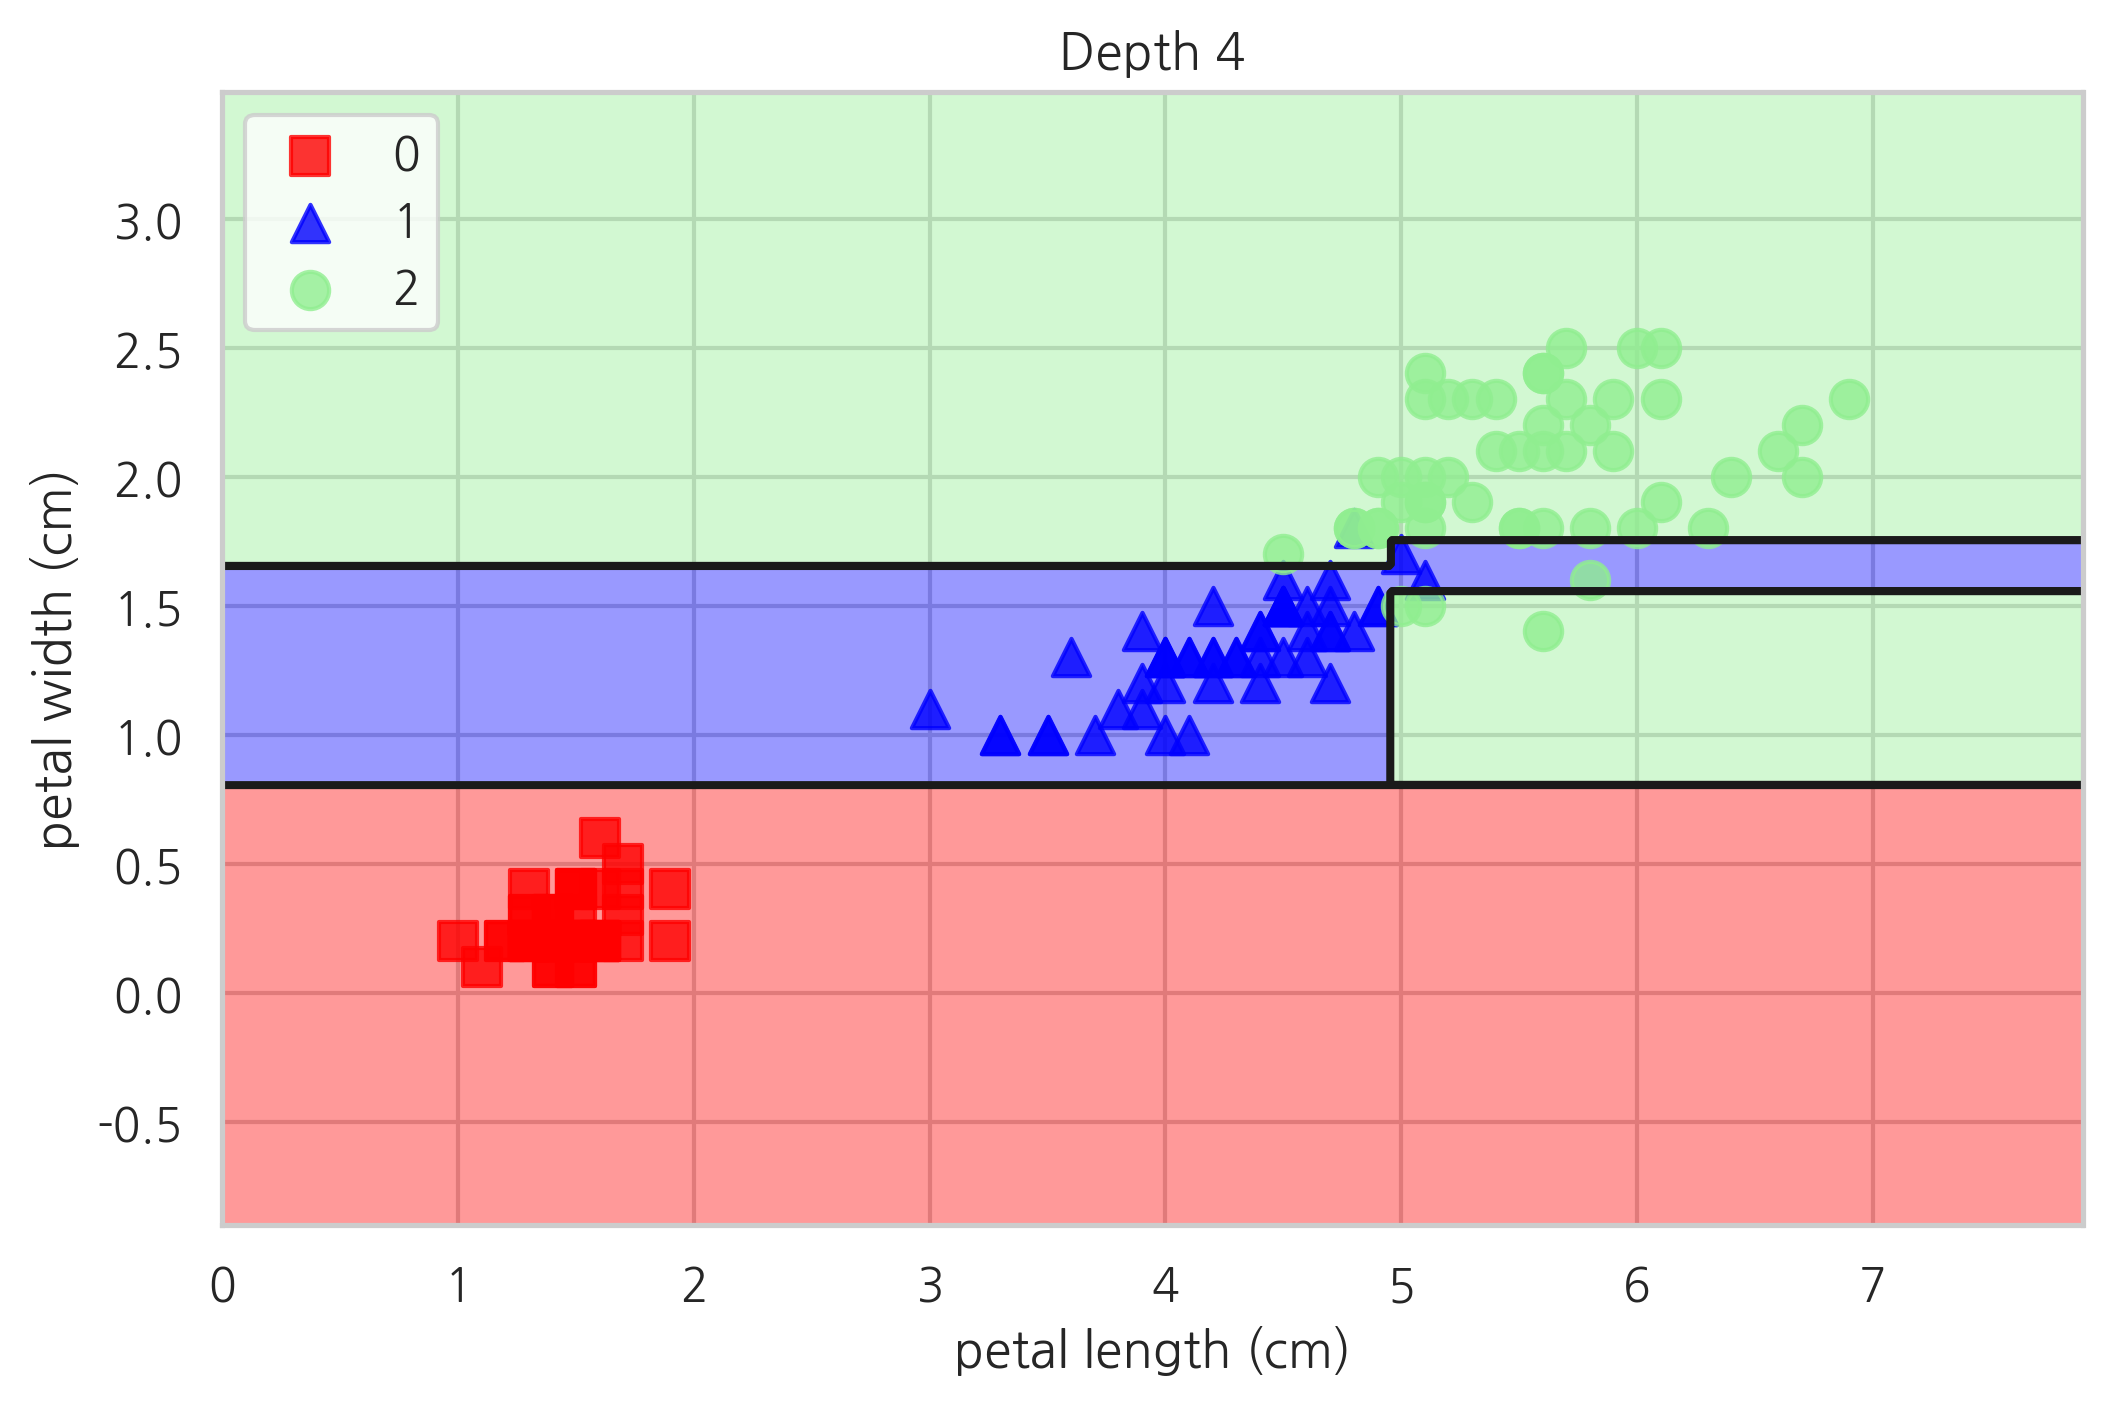

In [16]:
plot_decision_regions(X, y, tree4, "Depth 4")
plt.show()

In [17]:
confusion_matrix(y, tree4.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

In [18]:
tree5 = DecisionTreeClassifier(
    criterion='entropy', max_depth=5, random_state=0).fit(X, y)

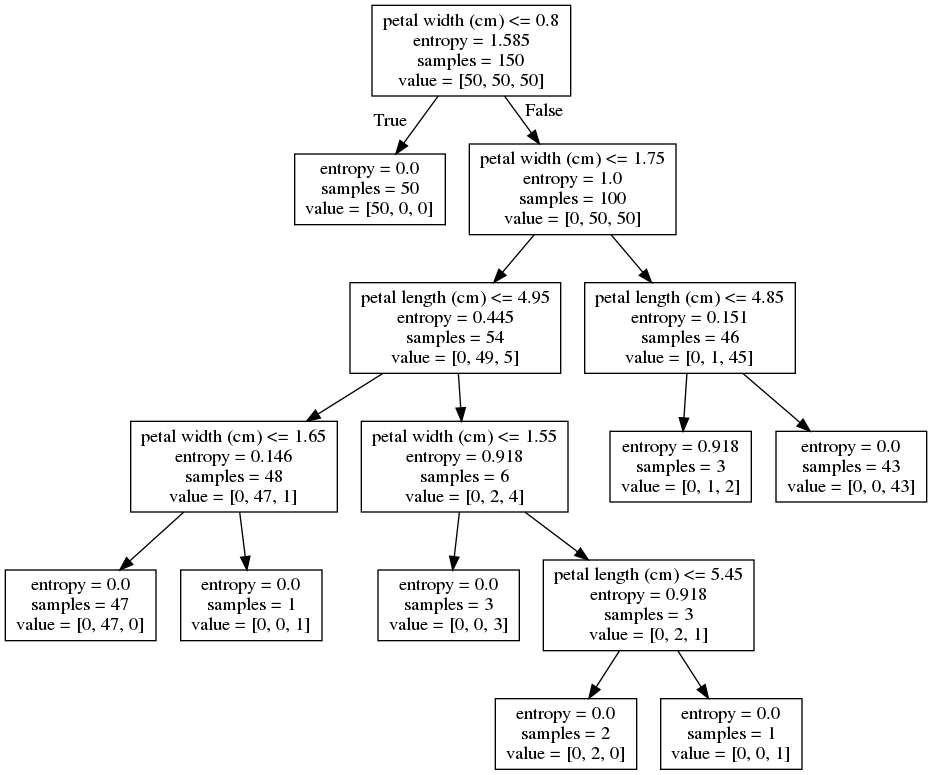

In [19]:
draw_decision_tree(tree5)

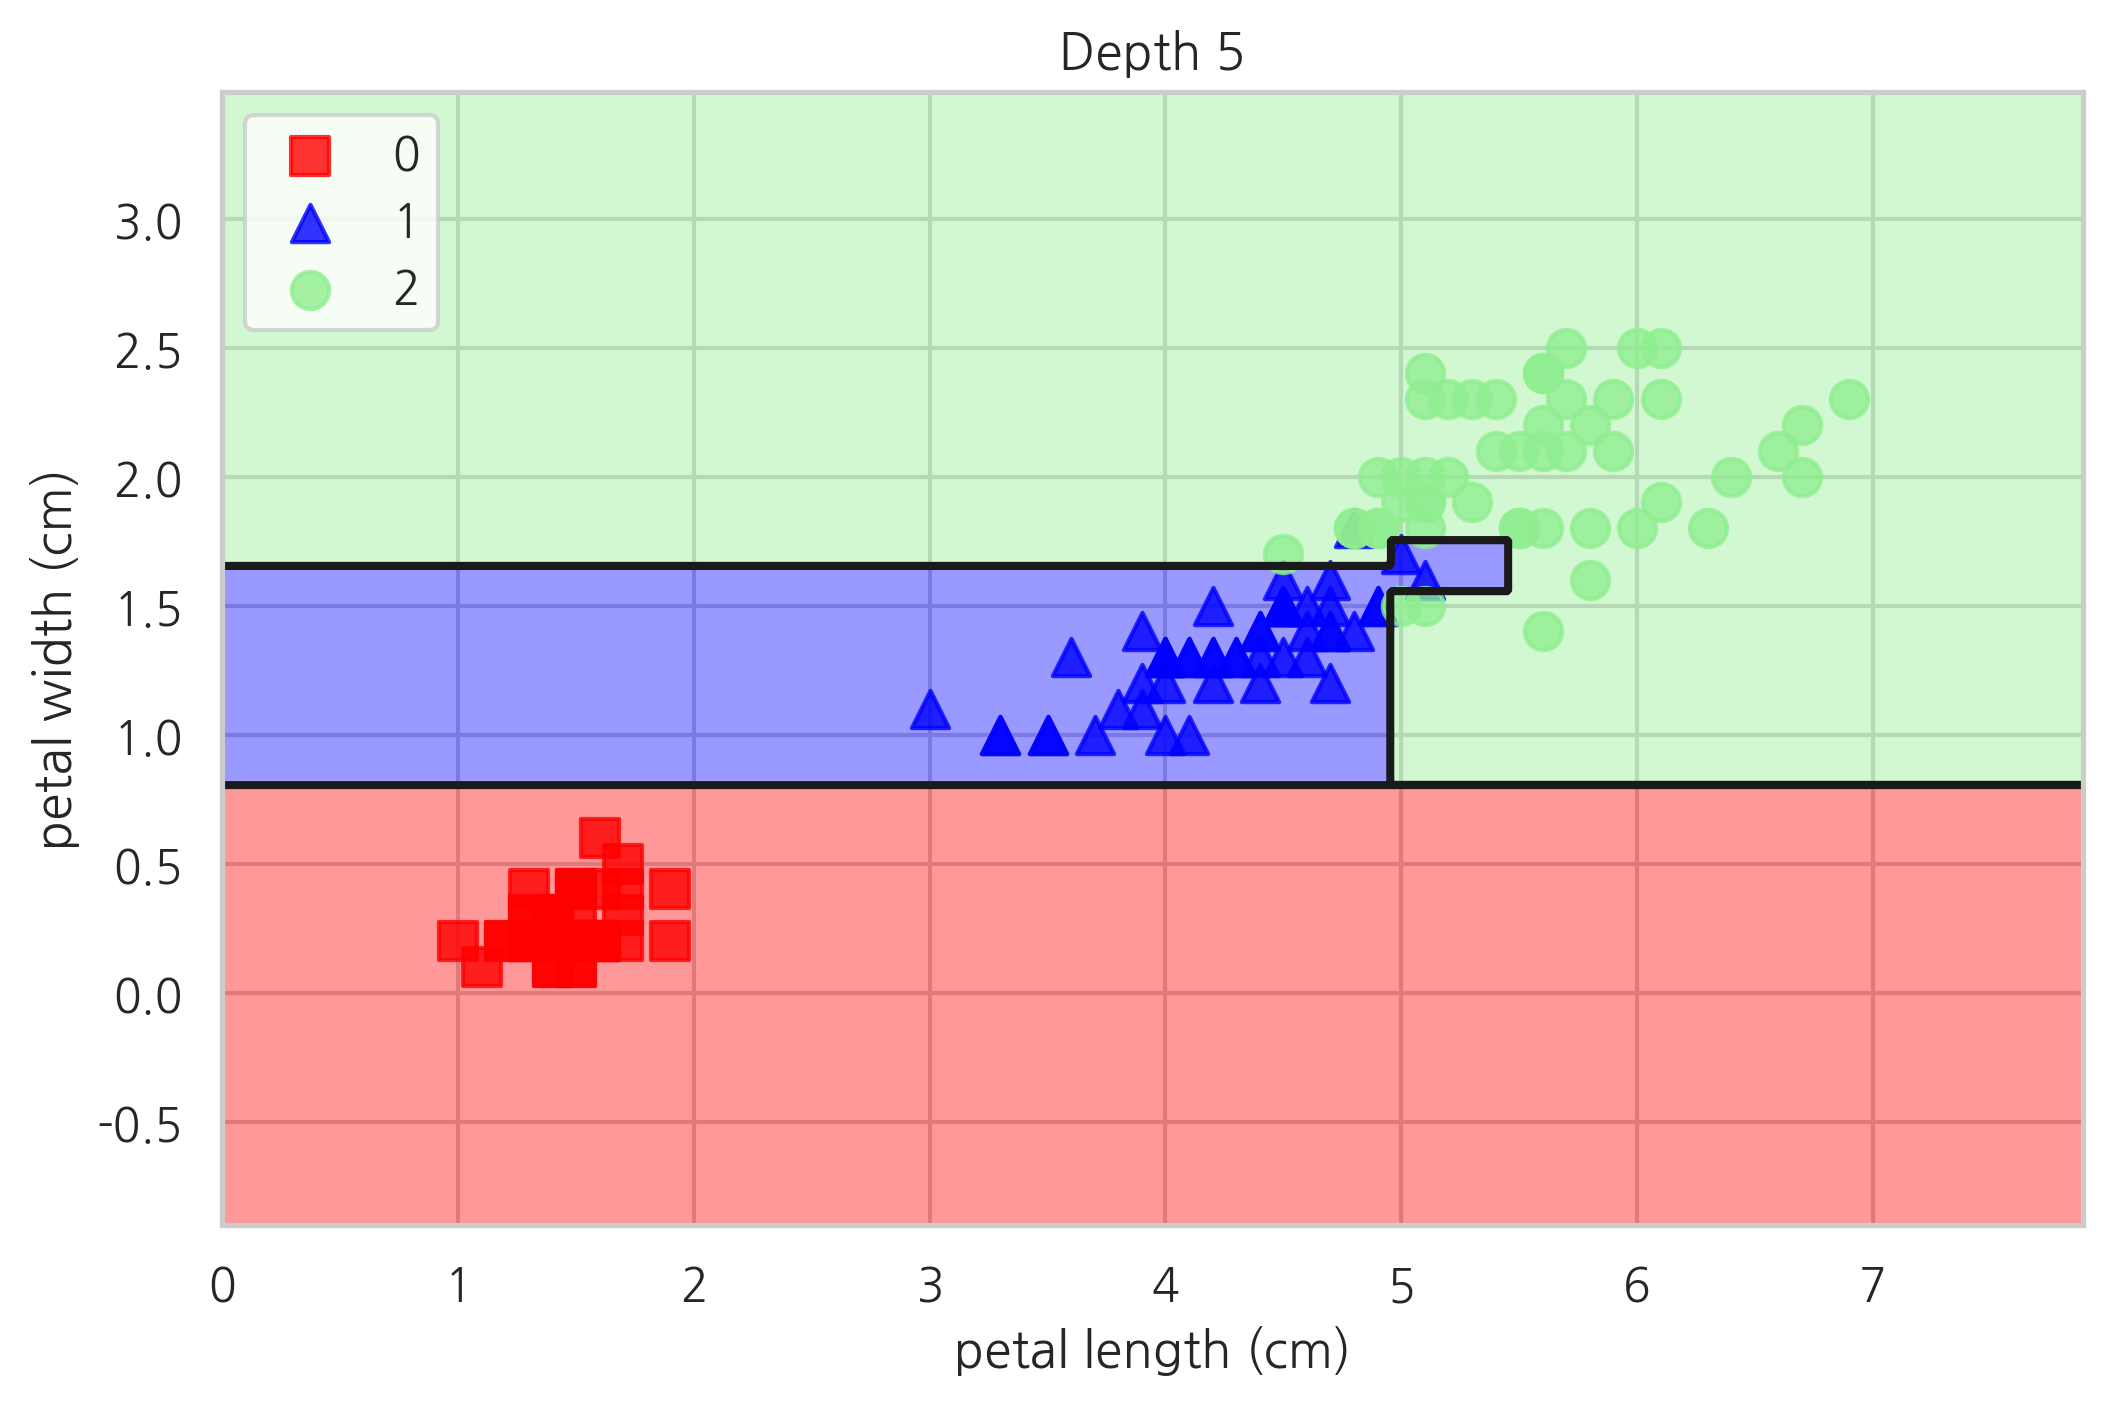

In [20]:
plot_decision_regions(X, y, tree5, "Depth 5")
plt.show()

In [21]:
confusion_matrix(y, tree5.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

#### 연습 문제 1

1. 붓꽃 분류 문제에서 꽃받침의 길이와 폭(sepal length, sepal width)을 사용하여 `max_depth=3`인  의사결정나무 모형을 만들고 정확도(accuracy)를 계산하라.
2. K=5 인 교차 검증을 통해 테스트 성능 평균을 측정하라.
3. `max_depth` 인수를 바꾸어 가면서 테스트 성능 평균을 구하여 cross validation curve를 그리고 가장 테스트 성능 평균이 좋은 `max_depth` 인수를 찾아라.

In [22]:
from sklearn.datasets import load_iris

iris = load_iris()
X1 = iris.data
y1 = iris.target
X1 = X1[:, :2]

from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(max_depth=3).fit(X1, y1)
y1_pred = model1.predict(X1)

from sklearn.metrics import accuracy_score

accuracy_score(y1, y1_pred)

0.8133333333333334

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(model1, X1, y1, scoring="accuracy", cv=5).mean()

0.7466666666666666

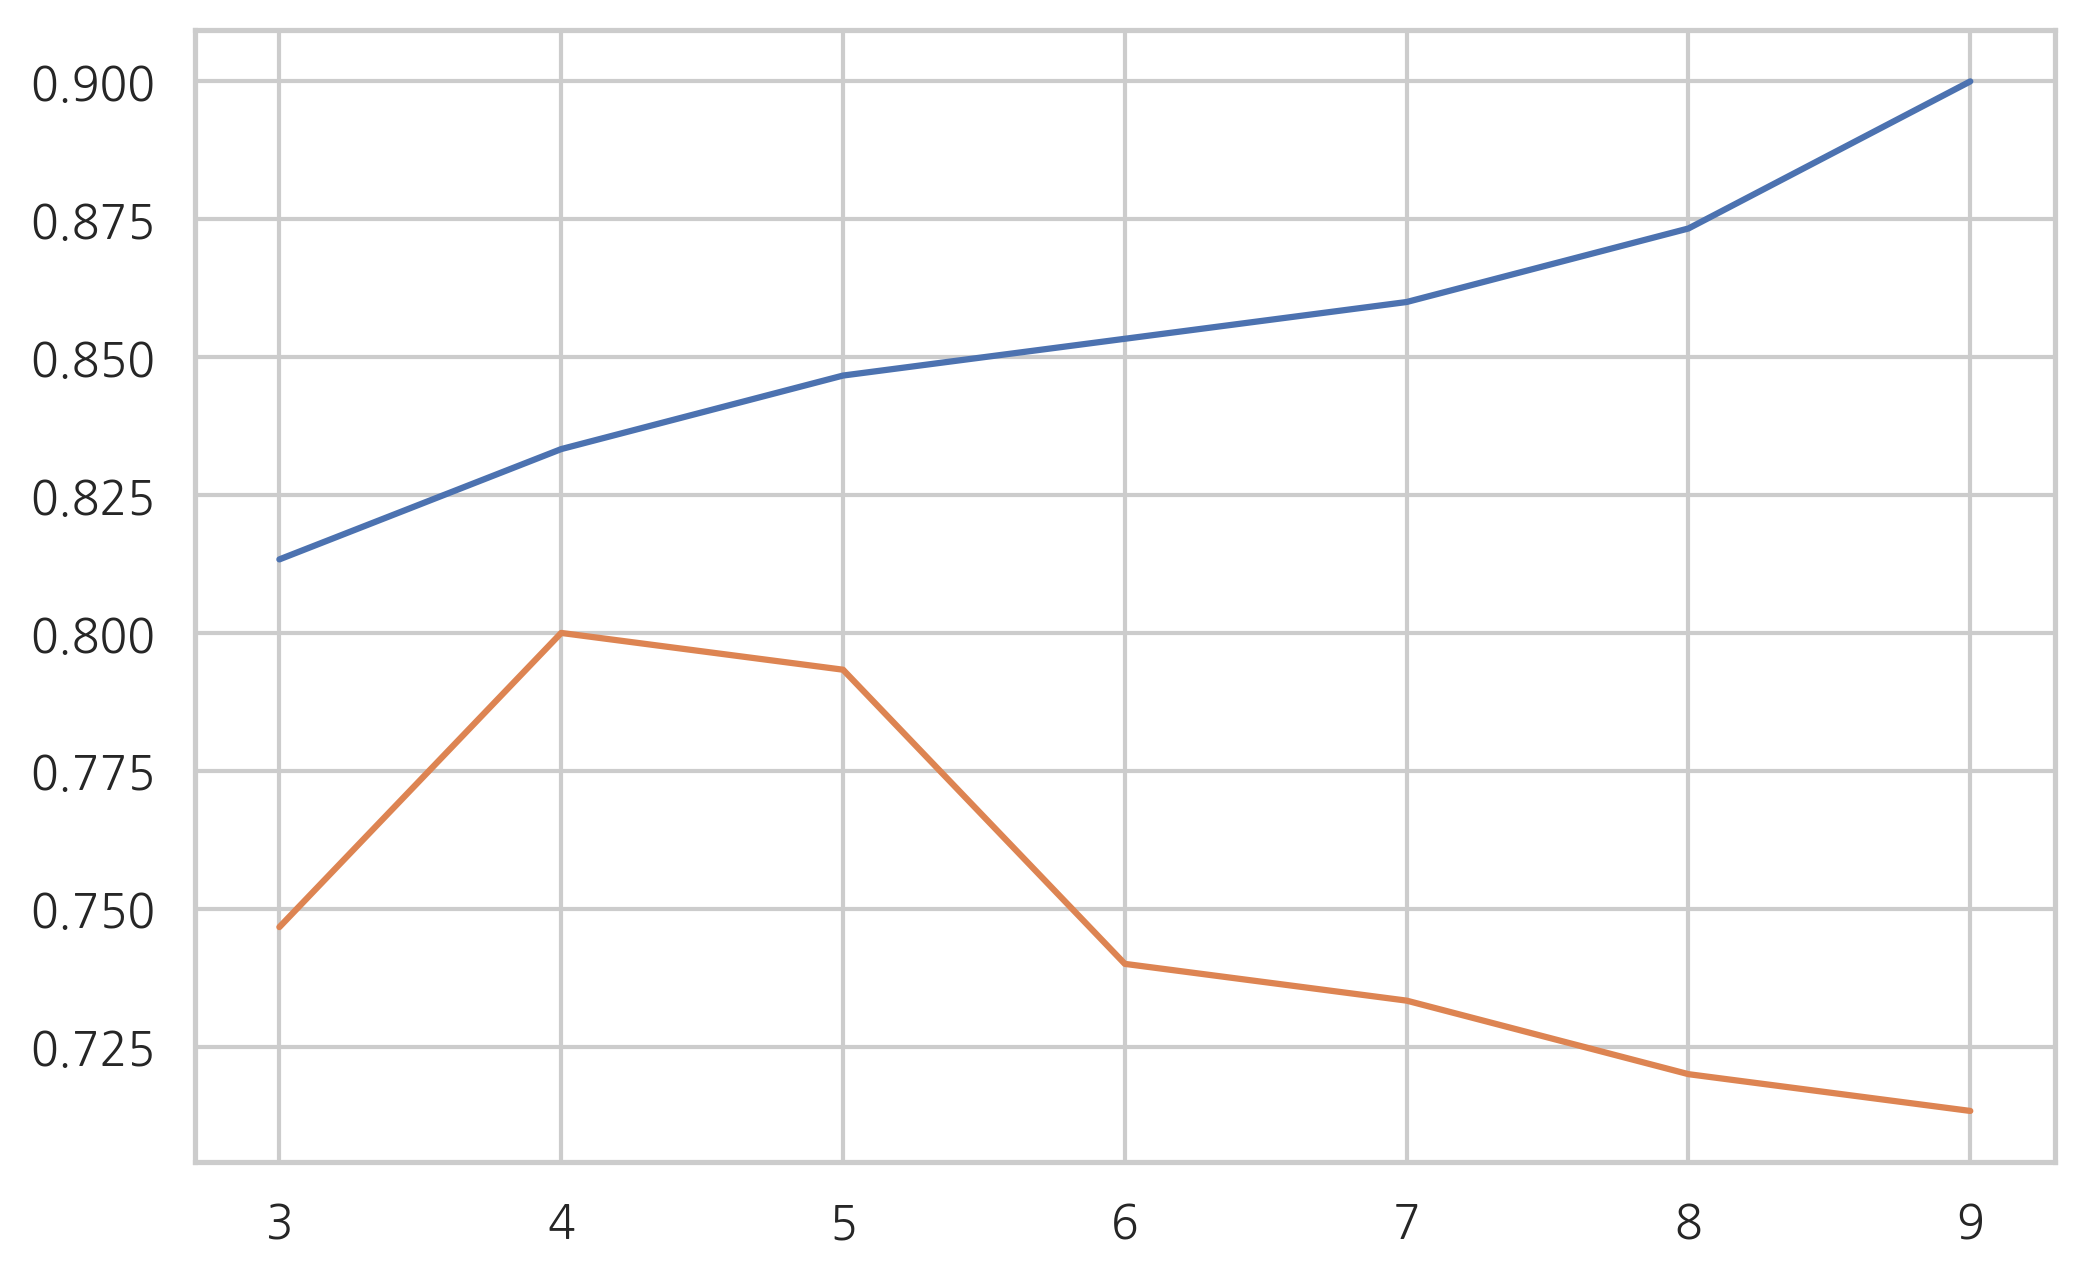

In [24]:
mean_test_accuracy = []
train_accuracy = []
for max_depth in np.arange(3, 10):
    model1 = DecisionTreeClassifier(max_depth=max_depth).fit(X1, y1)
    train_accuracy.append(accuracy_score(y1, model1.predict(X1)))
    mean_test_accuracy.append(cross_val_score(model1, X1, y1, scoring="accuracy", cv=5).mean())
    
    
plt.plot(np.arange(3, 10), train_accuracy)
plt.plot(np.arange(3, 10), mean_test_accuracy)
plt.show()

### 타이타닉호 생존자 예측

In [25]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
feature_names = ["pclass", "age", "sex"]
dfX = df[feature_names].copy()
dfy = df["survived"].copy()
dfX.tail()

,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [27]:
from sklearn.preprocessing import LabelEncoder
dfX["sex"] = LabelEncoder().fit_transform(dfX["sex"])
dfX.tail()

,pclass,age,sex
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [28]:
dfX["age"].fillna(dfX["age"].mean(), inplace=True)
dfX.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [29]:
from sklearn.preprocessing import LabelBinarizer
dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX["pclass"]),
                    columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX["pclass"])
dfX.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


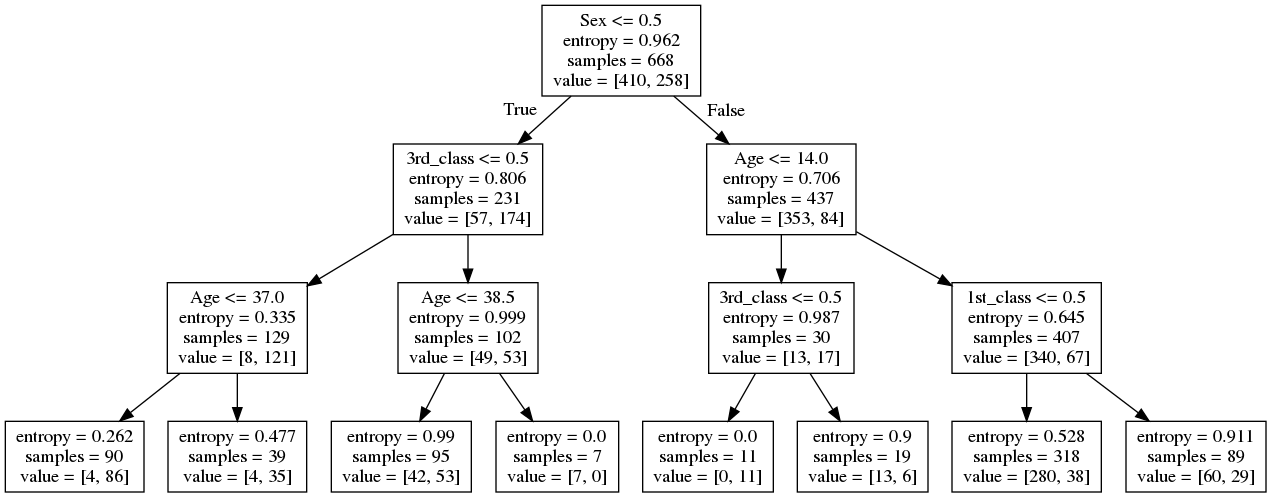

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)


model = DecisionTreeClassifier(
    criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)

command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, feature_names=[
                'Age', 'Sex', '1st_class', '2nd_class', '3rd_class'])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

In [31]:
confusion_matrix(y_train, model.predict(X_train))

array([[360,  50],
       [ 73, 185]])

In [32]:
confusion_matrix(y_test, model.predict(X_test))

array([[119,  20],
       [ 25,  59]])

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       410
           1       0.79      0.72      0.75       258

    accuracy                           0.82       668
   macro avg       0.81      0.80      0.80       668
weighted avg       0.81      0.82      0.81       668



In [34]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       139
           1       0.75      0.70      0.72        84

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



#### 연습 문제 2

1. breast cancer 분류 문제를 의사결정나무를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
2. 모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 기준은 무엇인가?

In [35]:
from sklearn.datasets import load_breast_cancer

bcancer = load_breast_cancer()
X2 = bcancer.data
y2 = bcancer.target

from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier().fit(X2, y2)

from sklearn.model_selection import cross_val_score

cross_val_score(model2, X2, y2, scoring="accuracy", cv=5).mean()

0.9138643067846607

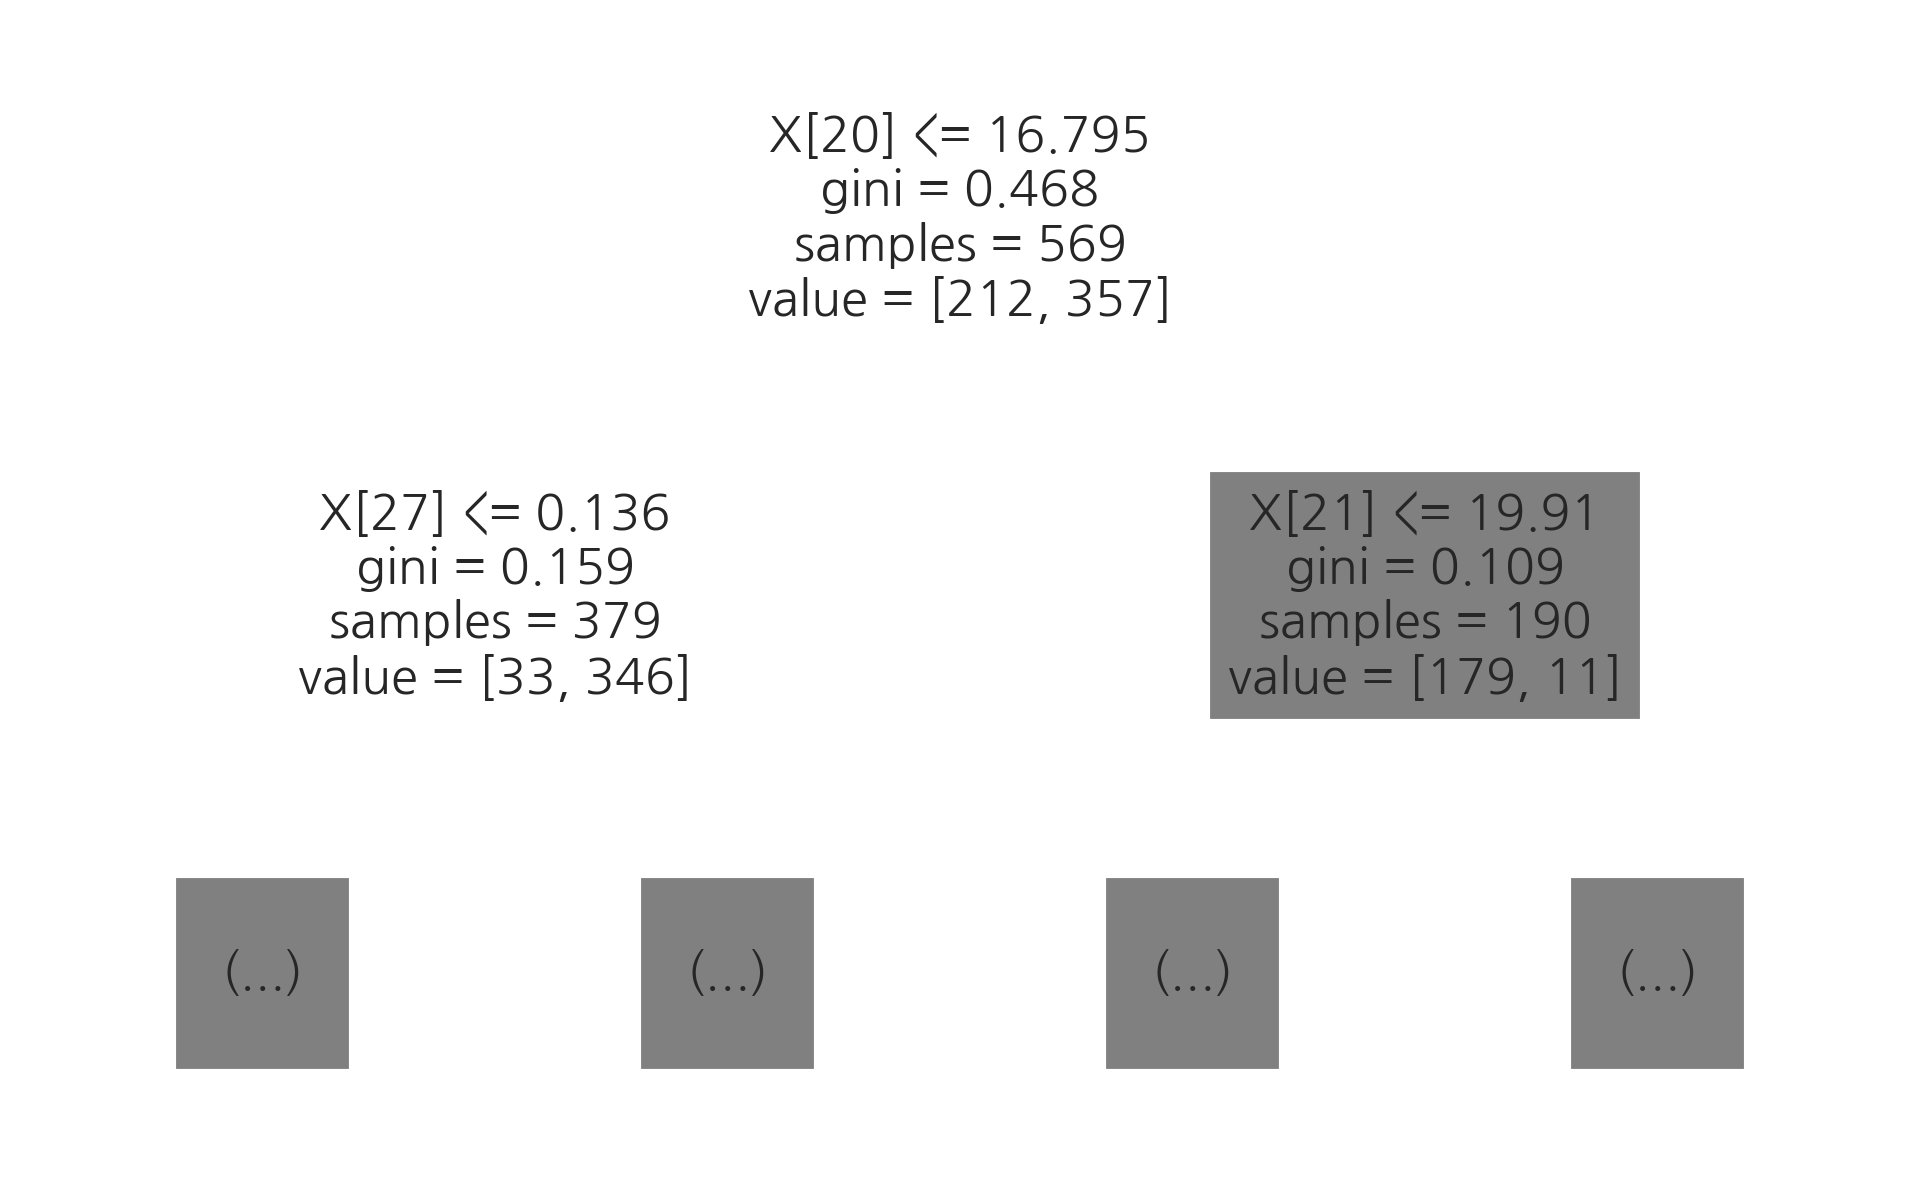

In [36]:
from sklearn.tree import plot_tree

plot_tree(model2, max_depth=1)
plt.show()

#### 연습 문제 3

1. MINIST digit 이미지 분류 문제를 의사결정나무를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
2. 모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 픽셀은 어디인가? 이 픽셀은 숫자들을 어떻게 구분하게 되며 왜 그렇게 구분지어지는지 생각하라.

In [37]:
from sklearn.datasets import load_digits

digits = load_digits()
X3 = digits.data
y3 = digits.target

from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier().fit(X3, y3)

from sklearn.model_selection import cross_val_score

cross_val_score(model3, X3, y3, scoring="accuracy", cv=5).mean()

0.7841272051996285

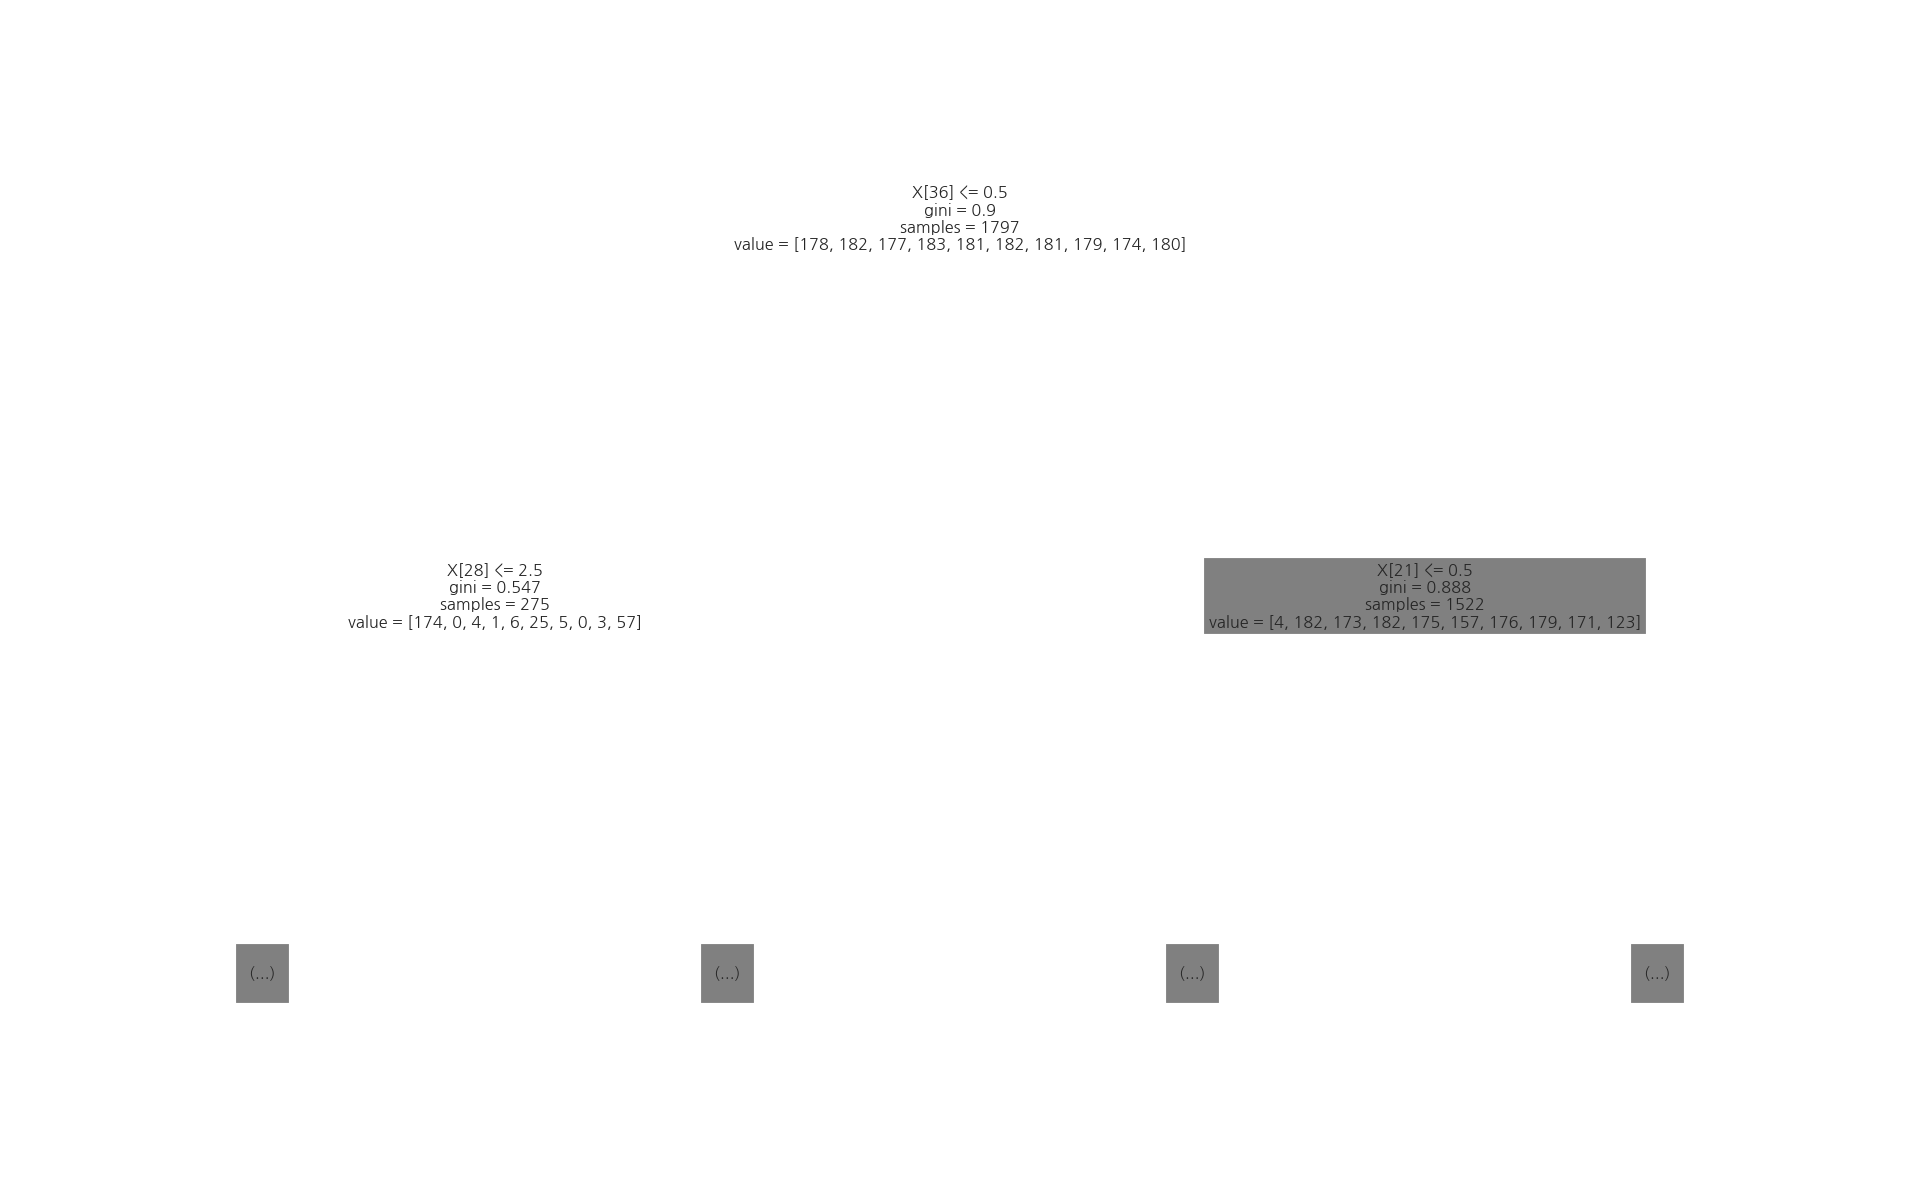

In [38]:
from sklearn.tree import plot_tree

plot_tree(model3, max_depth=1)
plt.show()

### Greedy 의사 결정

의사결정나무의 문제점 중 하나는 특징의 선택이 greedy한 방식으로 이루어지기 때문에 선택된 특징이 최적의 선택이 아닐 수도 있다는 점이다. 예를 들어 데이터가 다음과 같다고 하자. 

In [39]:
X = [
    [0, 0, 0],
    [1, 0, 0],
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 0],
    [1, 1, 0],
    [0, 1, 1],
    [1, 1, 1],
]
y = [0,0,1,1,1,1,0,0]

첫 노드에서는 $x_1, x_2, x_3$의  성능이 같다. 만약 첫 노드에서 특징으로 $x_1$을 선택하면 2단계로 완벽한 분류를 하는 것이 불가능하다. 그런데 첫 특징으로 $x_1$이 아니라 $x_3$를 선택하면 2번째 단계에서 $x_2$를 선택함으로써 2단계만에 완벽한 분류를 할 수 없다. 하지만 이후의 상황을 첫 노드에서 특징을 결정할 때는 알 수 없다.

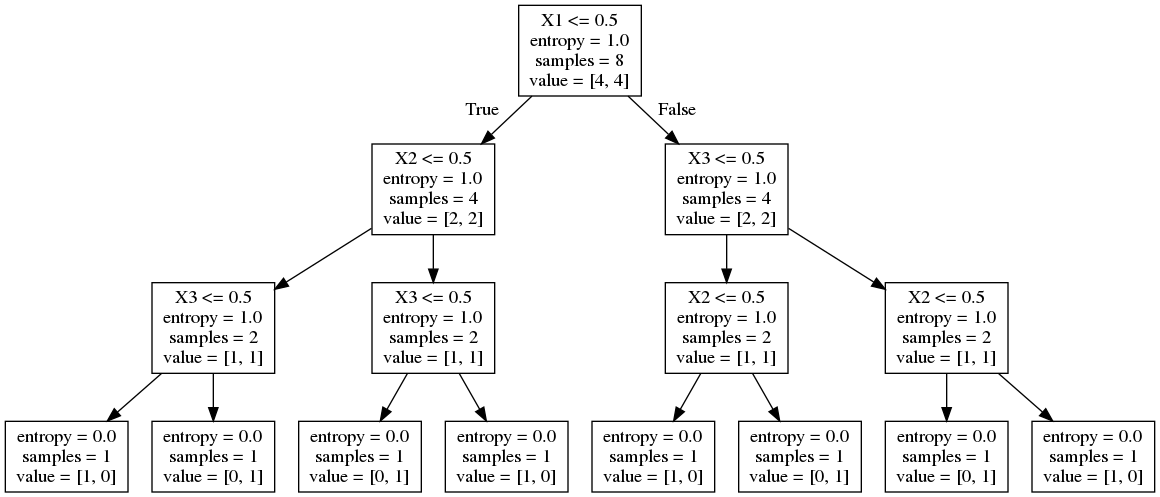

In [40]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2).fit(X, y)
command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, 
                feature_names=["X1", "X2", "X3"])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

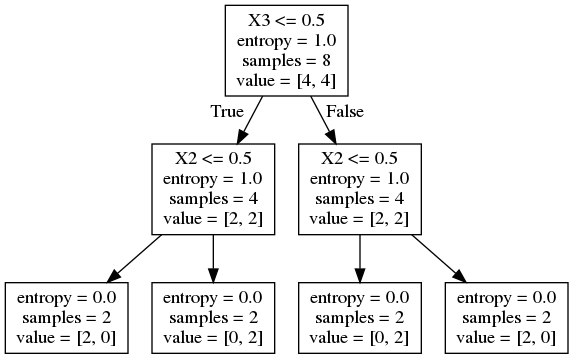

In [41]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=3).fit(X, y)
command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, 
                feature_names=["X1", "X2", "X3"])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

### 회귀 나무

예측값 $\hat{y}$을 다음처럼 각 특징값 영역마다 고정된 값 $y_1, y_2$를 사용하고,

$$ 
\hat{y} = 
\begin{cases} 
y_1 & \text{ if } x \geq x_{\text{threshold}} \\ 
y_2 & \text{ if } x < x_{\text{threshold}}
\end{cases} $$

기준값 및 $y_1, y_2$를 선택하는 목적함수로 오차 제곱합을 사용하면 회귀분석를 할 수 있다. 이러한 모형을 회귀 나무(regression tree)라고 한다.

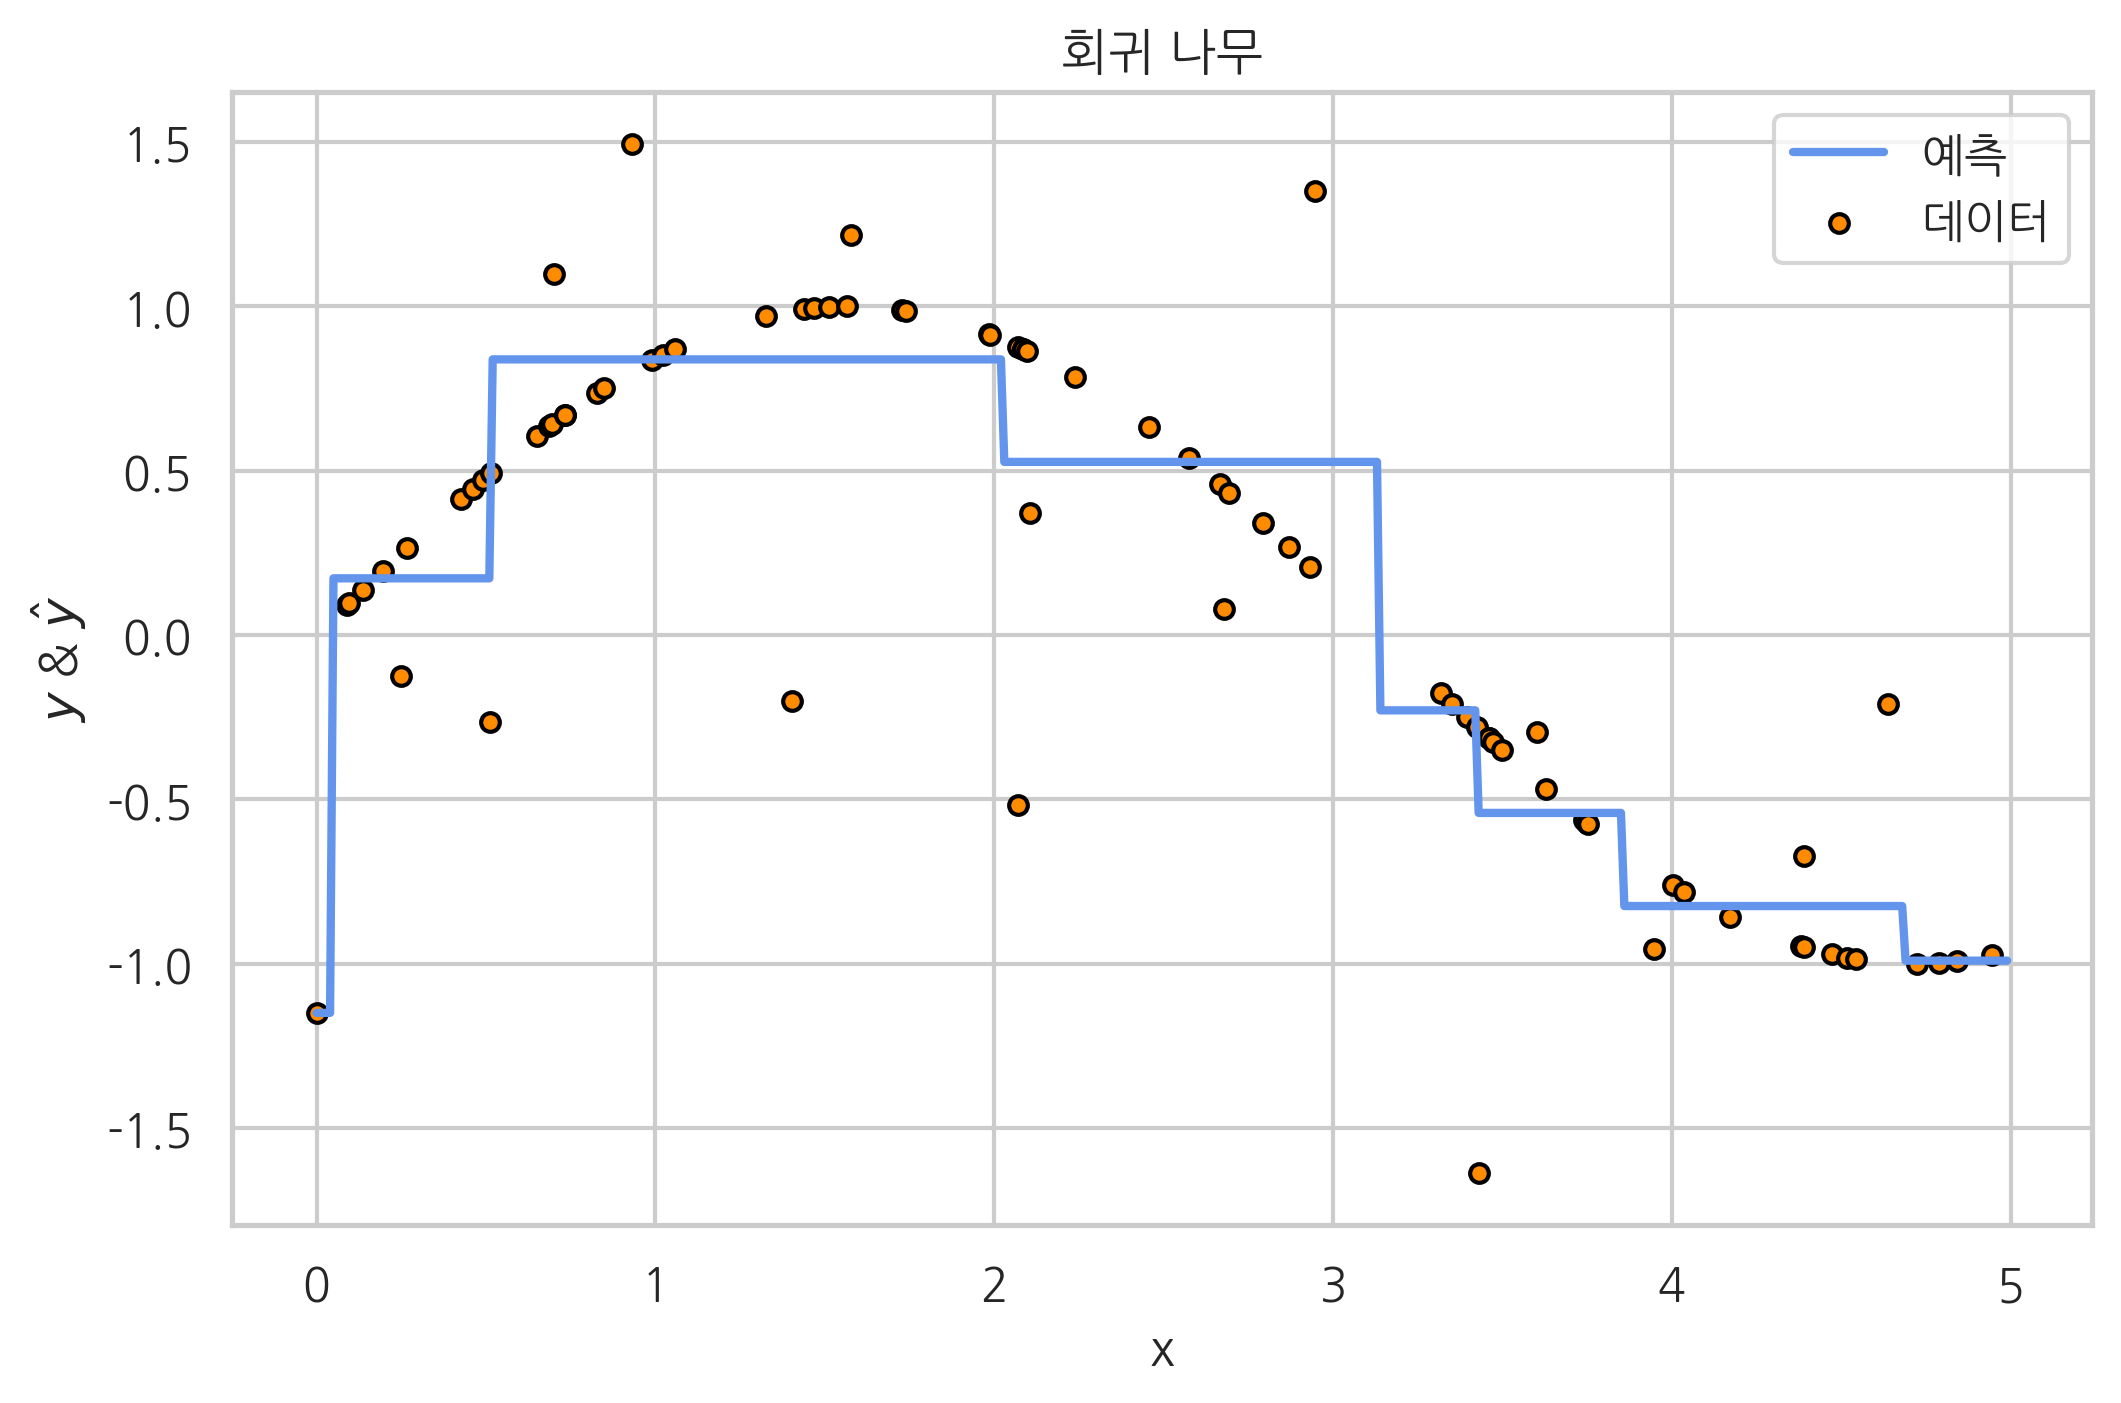

In [42]:
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regtree = DecisionTreeRegressor(max_depth=3)
regtree.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_hat = regtree.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="데이터")
plt.plot(X_test, y_hat, color="cornflowerblue", linewidth=2, label="예측")
plt.xlabel("x")
plt.ylabel(r"$y$ & $\hat{y}$")
plt.title("회귀 나무")
plt.legend()
plt.show()